<h2> Sub-group Analysis</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/dr.shivambhatnagar/Desktop/github_python/Diabetes_Dataset_Cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         300 non-null    object 
 1   TreatmentGroup        300 non-null    int64  
 2   RandomizationDate     300 non-null    object 
 3   StudySite             300 non-null    int64  
 4   Age                   300 non-null    int64  
 5   Gender                300 non-null    int64  
 6   BMI                   300 non-null    float64
 7   DiabetesDuration      300 non-null    int64  
 8   SmokingStatus         300 non-null    int64  
 9   EducationLevel        300 non-null    int64  
 10  Complications         300 non-null    int64  
 11  BaselineHbA1c         300 non-null    float64
 12  BaselineFBS           300 non-null    float64
 13  BaselineWeight        300 non-null    float64
 14  BaselineQoL           300 non-null    int64  
 15  FollowupCompleted     3

In [4]:
# Mapping numerical codes to descriptive labels
df['TreatmentGroup'] = df['TreatmentGroup'].map({0:'StandardCare',1:'NewMedication'})
df['StudySite'] = df['StudySite'].map({0:'Atlanta',1:'Boston',2:'Chicago',3:'Denver'})
df['Gender'] = df['Gender'].map({0:'Male',1:'Female'})
df['SmokingStatus'] = df['SmokingStatus'].map({0:'Never',1:'Former',2:'Current'})
df['EducationLevel'] = df['EducationLevel'].map({0:'Primary',1:'Secondary',2:'College+'})
df['Complications'] = df['Complications'].map({0:'None',1:'Neuropathy',2:'Retinopathy',3:'Both'})
df['FollowupCompleted'] = df['FollowupCompleted'].map({0:'No',1:'Yes'}) 
df['TargetAchieved'] = df['TargetAchieved'].map({0:'No',1:'Yes'})   
df['PatientSatisfaction'] = df['PatientSatisfaction'].map({0:'Poor',1:'Fair',2:'Good',3:'Excellent'})
df['AdverseEvents'] = df['AdverseEvents'].map({0:'None',1:'Mild',2:'Moderate',3:'Severe'})
df['ComplicationOccurred'] = df['ComplicationOccurred'].map({0:'Censored',1:'Event'})

/var/folders/9k/zh9d02tx1438c7s9mf69hw1h0000gn/T/ipykernel_25042/524388497.py:13: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


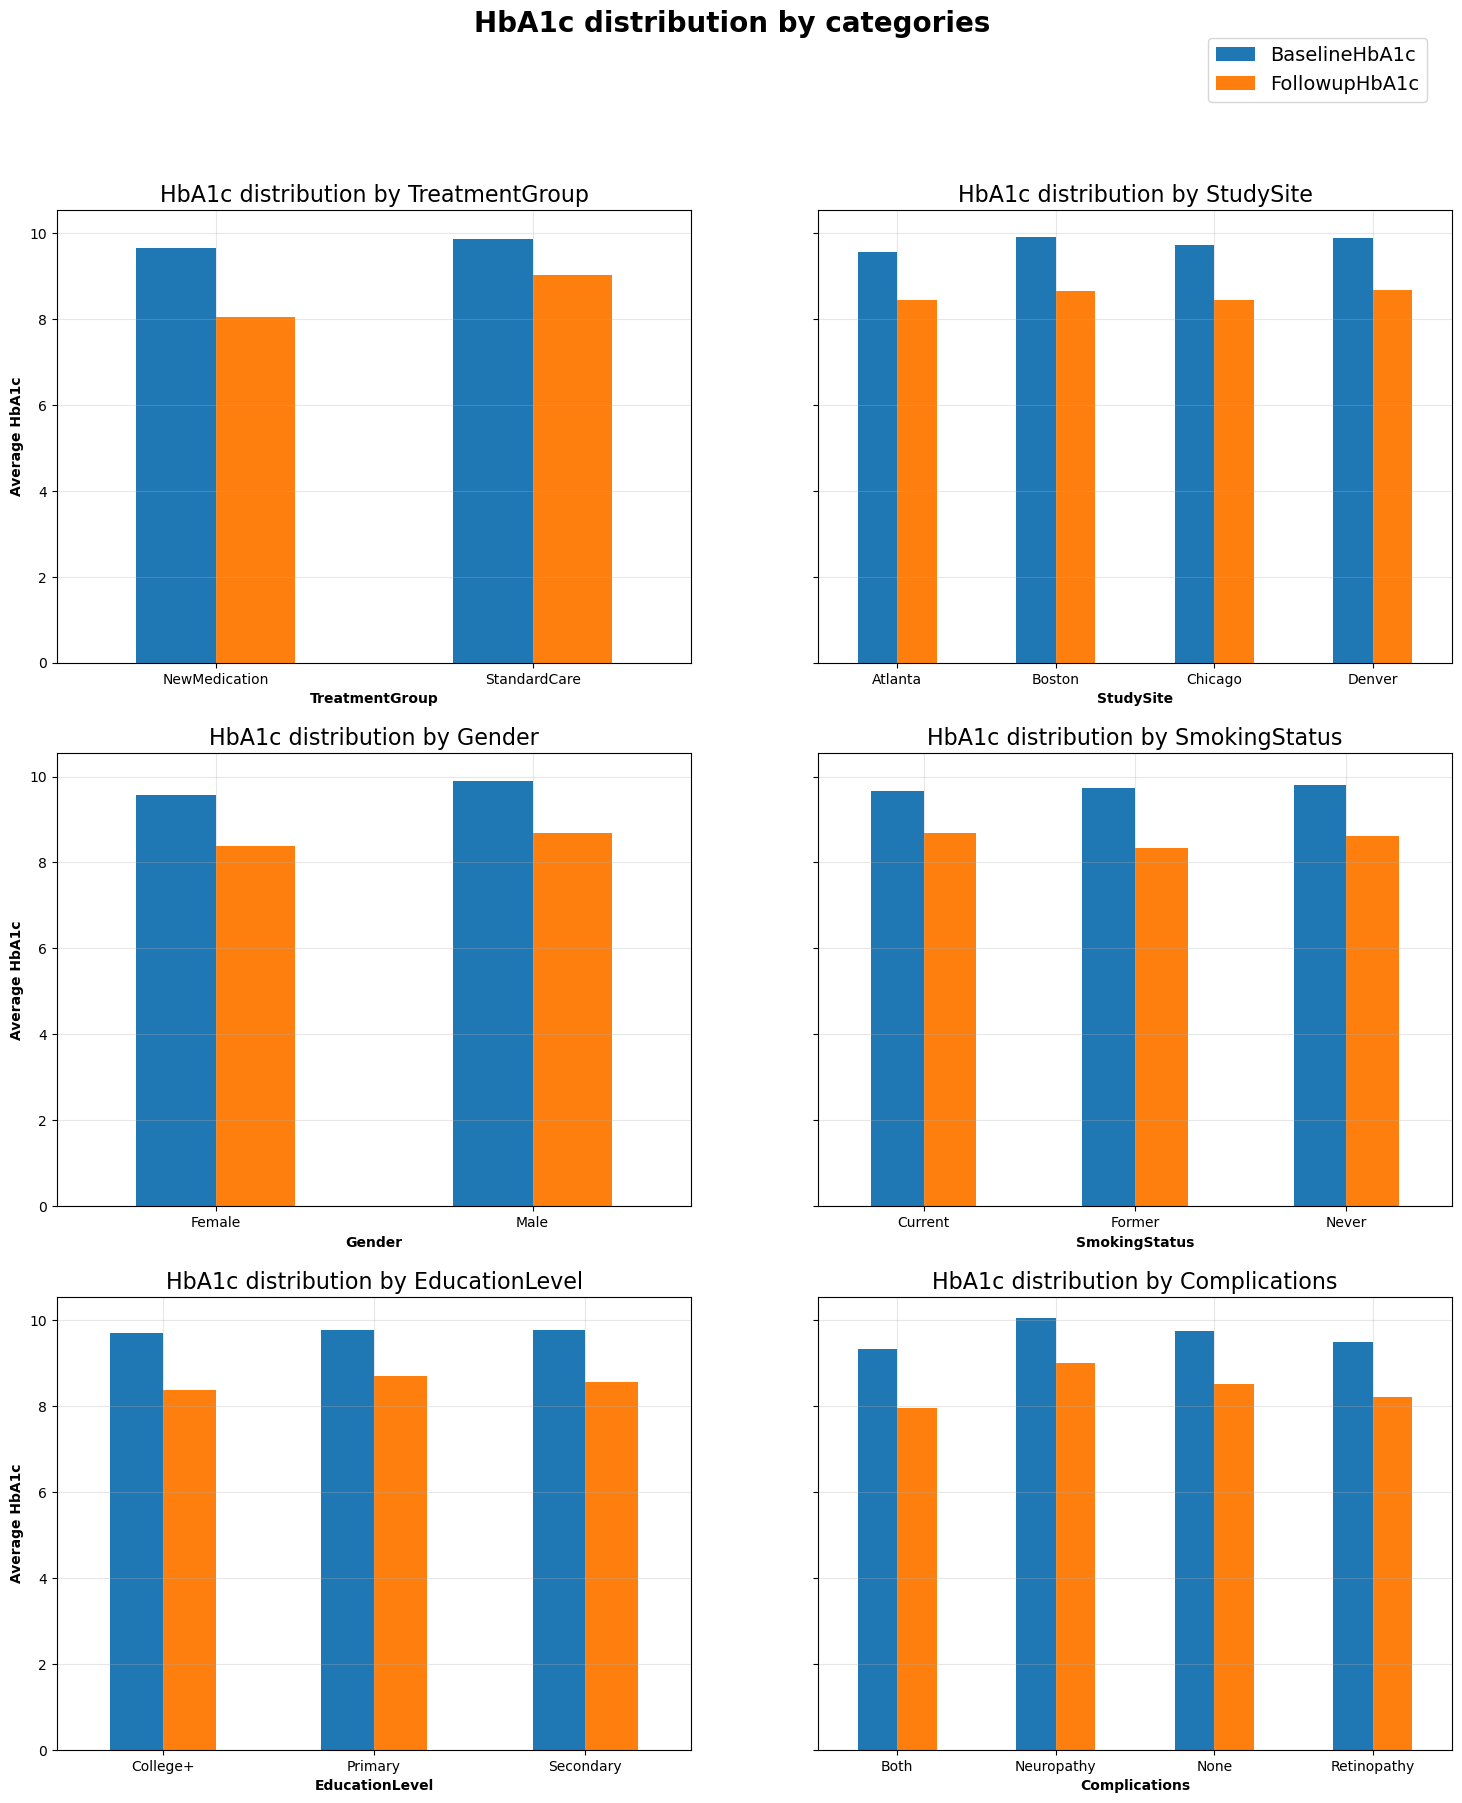

In [5]:
cat_vars = ['TreatmentGroup','StudySite','Gender','SmokingStatus','EducationLevel','Complications']
fig, axes = plt.subplots(3,2, figsize = (18,20), sharey=True)
plt.suptitle('HbA1c distribution by categories', fontsize = 20, fontweight='bold')
for i, var in enumerate(cat_vars):
    crosstab = df.groupby(var)[['BaselineHbA1c','FollowupHbA1c']].mean()
    crosstab.plot(kind='bar', ax = axes[i//2, i%2], legend=False)
    axes[i//2, i%2].set_title(f'HbA1c distribution by {var}', fontsize=16)
    axes[i//2, i%2].set_xlabel(f'{var}', fontweight='bold')
    axes[i//2, i%2].set_ylabel('Average HbA1c', fontweight='bold')
    axes[i//2, i%2].tick_params(axis='x',rotation=0)
    axes[i//2, i%2].grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(0.6, 3.8), loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

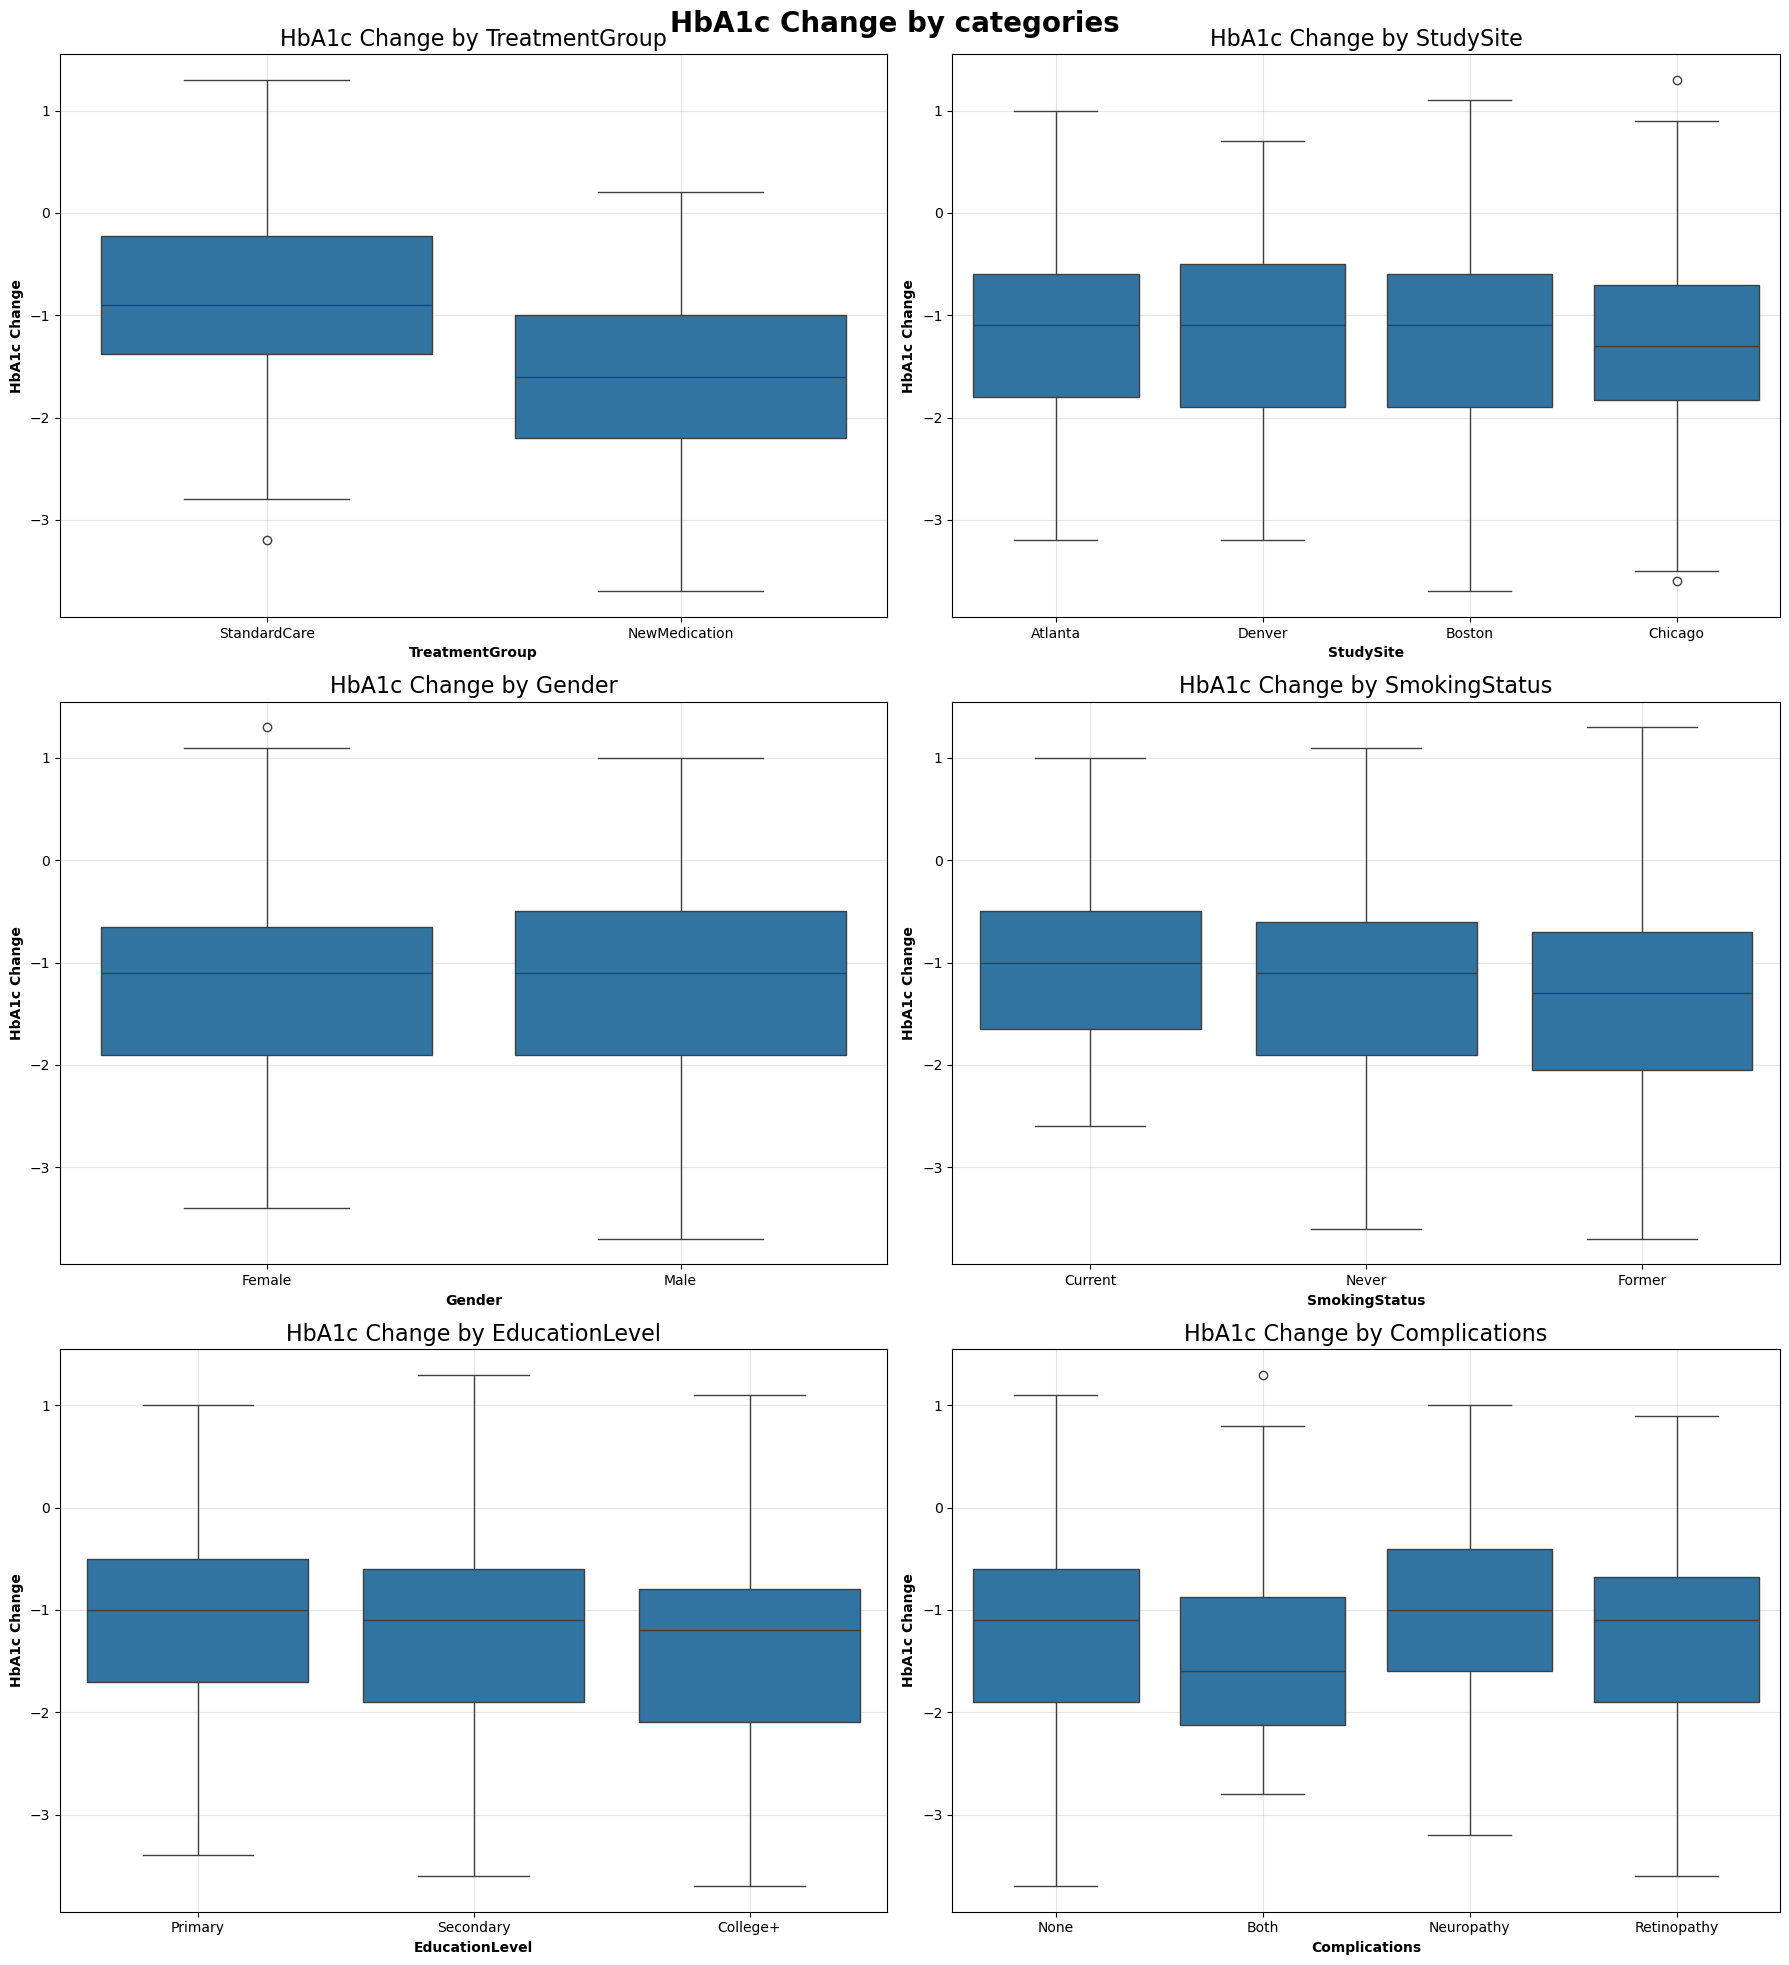

In [6]:
# Boxplots for HbA1c Change by categorical variables
fig, axes = plt.subplots(3,2, figsize = (18,20))
plt.suptitle('HbA1c Change by categories', fontsize = 20, fontweight='bold')
for i, var in enumerate(cat_vars):
    sns.boxplot(data=df, x=var, y='HbA1cChange', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'HbA1c Change by {var}', fontsize=16)
    axes[i//2, i%2].set_xlabel(f'{var}', fontweight='bold')
    axes[i//2, i%2].set_ylabel('HbA1c Change', fontweight='bold')
    axes[i//2, i%2].tick_params(axis='x',rotation=0)
    axes[i//2, i%2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<h3> Association between categorical variables and Followup HbA1c, while controlling for Baseline HbA1c</h3>
<tab>--> Test used: ANCOVA

In [7]:
import pingouin as pg
for var in cat_vars:
    ancova_results = pg.ancova(data=df, dv='FollowupHbA1c', covar='BaselineHbA1c', between=var)
    print(f'ANCOVA results for {var}:\n', ancova_results, '\n')

ANCOVA results for TreatmentGroup:
            Source          SS   DF           F         p-unc       np2
0  TreatmentGroup   42.569927    1   54.313377  1.704713e-12  0.154601
1   BaselineHbA1c  589.373778    1  751.959954  2.283186e-83  0.716862
2        Residual  232.783689  297         NaN           NaN       NaN 

ANCOVA results for StudySite:
           Source          SS   DF           F         p-unc      np2
0      StudySite    1.864267    3    0.670299  5.708590e-01  0.00677
1  BaselineHbA1c  616.804940    1  665.318260  1.374723e-77  0.69281
2       Residual  273.489348  295         NaN           NaN      NaN 

ANCOVA results for Gender:
           Source          SS   DF           F         p-unc       np2
0         Gender    0.207457    1    0.223935  6.364057e-01  0.000753
1  BaselineHbA1c  611.672566    1  660.255455  1.848844e-77  0.689738
2       Residual  275.146158  297         NaN           NaN       NaN 

ANCOVA results for SmokingStatus:
           Source        

<h3> Association between Categorical variables and Target Achieved</h4>
<tab> --> Test Used: Chi-squared Test</tab>

In [8]:
from scipy import stats
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df['TargetAchieved'])
    print(f'Contingency Table for Target Achievement by {var}:')
    display(contingency_table)
    #chi-squared test
    chi2,p,dof,expected = stats.chi2_contingency(contingency_table)
    print(f'Chi-square test results for Target Achievement by {var}:')
    print(f'Chi2 Statistic: {chi2:.2f}, p-value: {p:.2f}, Degrees of Freedom: {dof} \n')

Contingency Table for Target Achievement by TreatmentGroup:


TargetAchieved,No,Yes
TreatmentGroup,,
NewMedication,72,78
StandardCare,114,36


Chi-square test results for Target Achievement by TreatmentGroup:
Chi2 Statistic: 23.78, p-value: 0.00, Degrees of Freedom: 1 

Contingency Table for Target Achievement by StudySite:


TargetAchieved,No,Yes
StudySite,,
Atlanta,63,38
Boston,49,29
Chicago,41,27
Denver,33,20


Chi-square test results for Target Achievement by StudySite:
Chi2 Statistic: 0.11, p-value: 0.99, Degrees of Freedom: 3 

Contingency Table for Target Achievement by Gender:


TargetAchieved,No,Yes
Gender,,
Female,85,54
Male,101,60


Chi-square test results for Target Achievement by Gender:
Chi2 Statistic: 0.03, p-value: 0.87, Degrees of Freedom: 1 

Contingency Table for Target Achievement by SmokingStatus:


TargetAchieved,No,Yes
SmokingStatus,,
Current,35,20
Former,65,34
Never,86,60


Chi-square test results for Target Achievement by SmokingStatus:
Chi2 Statistic: 1.22, p-value: 0.54, Degrees of Freedom: 2 

Contingency Table for Target Achievement by EducationLevel:


TargetAchieved,No,Yes
EducationLevel,,
College+,46,35
Primary,43,30
Secondary,97,49


Chi-square test results for Target Achievement by EducationLevel:
Chi2 Statistic: 2.45, p-value: 0.29, Degrees of Freedom: 2 

Contingency Table for Target Achievement by Complications:


TargetAchieved,No,Yes
Complications,,
Both,15,9
Neuropathy,44,25
None,99,68
Retinopathy,28,12


Chi-square test results for Target Achievement by Complications:
Chi2 Statistic: 1.70, p-value: 0.64, Degrees of Freedom: 3 



<h3> Association between Adverse Events and Medication Adherence</h4>
<tab>--> Test Used: One-way ANOVA

In [9]:
anova_results = pg.anova(data = df, dv='MedicationAdherence', between = 'AdverseEvents', detailed = True)
print('ANOVA results for Medication Adherence by Adverse Events:\n', anova_results) 

ANOVA results for Medication Adherence by Adverse Events:
           Source            SS   DF          MS         F     p-unc       np2
0  AdverseEvents      3.660922    3    1.220307  0.010759  0.998469  0.000109
1         Within  33572.691445  296  113.421255       NaN       NaN       NaN


<h3>Further Investigations

<h5> Q. Why Former smokers show higher negative HbA1c change than Never smokers?

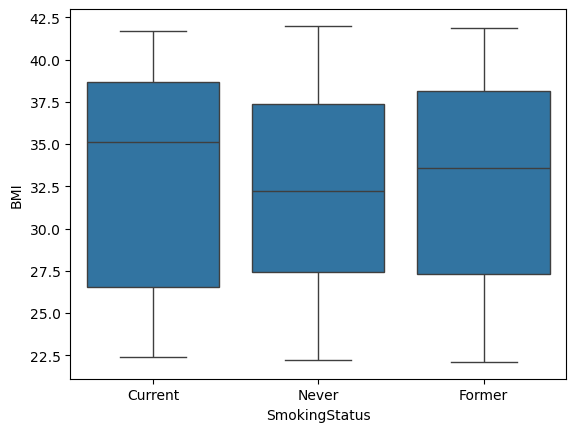

In [10]:
sns.boxplot(data=df, x='SmokingStatus', y='BMI')
plt.show()

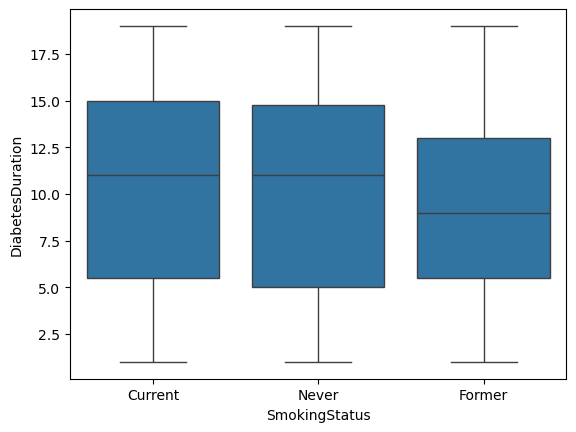

In [11]:
sns.boxplot(data=df, x='SmokingStatus', y='DiabetesDuration')
plt.show()

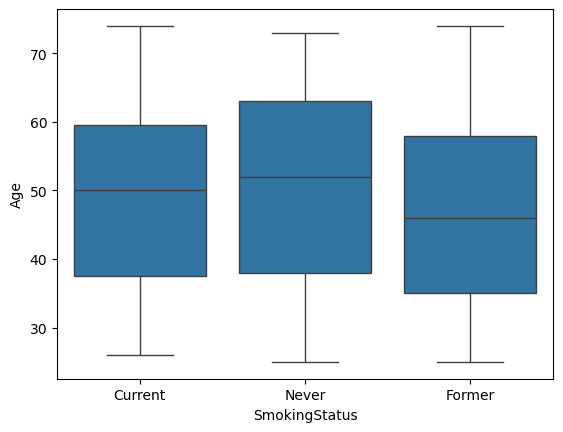

In [12]:
sns.boxplot(data=df, x='SmokingStatus', y='Age')
plt.show()

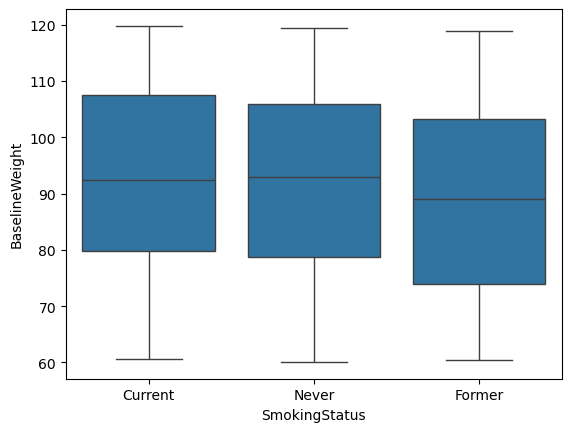

In [13]:
sns.boxplot(data=df, x='SmokingStatus', y='BaselineWeight')
plt.show()

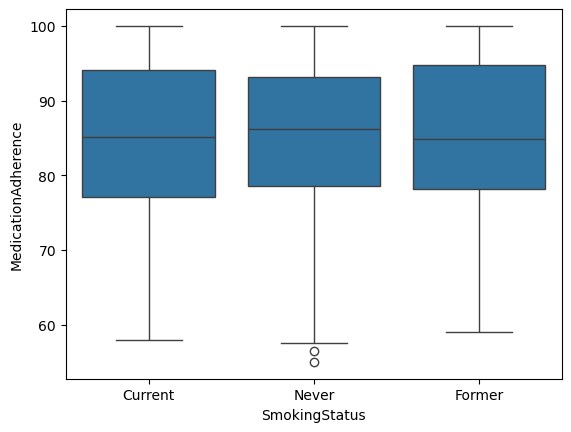

In [14]:
sns.boxplot(data=df, x='SmokingStatus', y='MedicationAdherence')
plt.show()

In [17]:
current = df[df['SmokingStatus']=='Current']['MedicationAdherence'].mean()
former = df[df['SmokingStatus']=='Former']['MedicationAdherence'].mean()
never = df[df['SmokingStatus']=='Never']['MedicationAdherence'].mean()
print(f'Mean Medication Adherence - \n Current Smokers: {current:.2f},\n Former Smokers: {former:.2f},\n Never Smokers: {never:.2f}')  

Mean Medication Adherence - 
 Current Smokers: 84.75,
 Former Smokers: 85.80,
 Never Smokers: 85.28


In [ ]:
anova_smoking = pg.anova(data=df, dv='MedicationAdherence', between='SmokingStatus')
print("=== ANOVA for Medication Adherence by Smoking Status ===")
print(anova_smoking)

=== ANOVA for Medication Adherence by Smoking Status ===
          Source  ddof1  ddof2         F     p-unc       np2
0  SmokingStatus      2    297  0.177782  0.837214  0.001196


<h5>How does Education level affect Glycemic control?

In [20]:
primary = df[df['EducationLevel']=='Primary']['MedicationAdherence'].mean()
secondary = df[df['EducationLevel']=='Secondary']['MedicationAdherence'].mean()
college = df[df['EducationLevel']=='College+']['MedicationAdherence'].mean()
print(f'Mean Medication Adherence - \n Primary Education: {primary:.2f},\n Secondary Education: {secondary:.2f},\n College+: {college:.2f}')

Mean Medication Adherence - 
 Primary Education: 85.34,
 Secondary Education: 85.24,
 College+: 85.58


In [22]:
anova_education = pg.anova(data=df, dv='MedicationAdherence', between='EducationLevel')
print("=== ANOVA for Medication Adherence by Education Level ===")
print(anova_education)

=== ANOVA for Medication Adherence by Education Level ===
           Source  ddof1  ddof2         F     p-unc      np2
0  EducationLevel      2    297  0.026711  0.973645  0.00018
